# Transformer 
Transformer from scratch with NumpPy

## Library

In [123]:
!pip install numpy
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.1/8.1 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 225.2/225.2 kB 4.6 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.3/2.3 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 73.8/73.8 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 3.8 MB/s eta 0:00:00
     ------------------------------------ 113.9/113.9 kB 950.9 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Token Embedding

In [93]:
# make a list of sentences
sentences = [
    "noodle is delicious",
    "i like hot rice",
    "the weather is cold",
    "that rice is cold",
    "i eat hot noodle",
    "good weather today",
    "noodle and rice are food",
    "i eat food",
    "the food is good",
    "the noodle is good"
]
sentences

['noodle is delicious',
 'i like hot rice',
 'the weather is cold',
 'that rice is cold',
 'i eat hot noodle',
 'good weather today',
 'noodle and rice are food',
 'i eat food',
 'the food is good',
 'the noodle is good']

In [177]:
len(sentences)

10

In [94]:
# get words from sentences
words = set()
for sentence in sentences:
    for word in sentence.split():
        words.add(word)

words

{'and',
 'are',
 'cold',
 'delicious',
 'eat',
 'food',
 'good',
 'hot',
 'i',
 'is',
 'like',
 'noodle',
 'rice',
 'that',
 'the',
 'today',
 'weather'}

In [95]:
# map each words with unique id
vocab = {
    "<S>":0, # start of the sentence
    "<E>":1, # end of the sentence
    "<P>":2 # padding/empty word 
}

# map each id to word
rvocab = {
    0:"<S>", # start of the sentence
    1:"<E>", # end of the sentence
    2:"<P>" # padding/empty word 
}

for i, word in enumerate(words, start=3):
    vocab[word] = i
    rvocab[i] = word

vocab

{'<S>': 0,
 '<E>': 1,
 '<P>': 2,
 'is': 3,
 'food': 4,
 'rice': 5,
 'like': 6,
 'the': 7,
 'and': 8,
 'weather': 9,
 'that': 10,
 'hot': 11,
 'cold': 12,
 'i': 13,
 'delicious': 14,
 'eat': 15,
 'good': 16,
 'today': 17,
 'are': 18,
 'noodle': 19}

In [96]:
rvocab

{0: '<S>',
 1: '<E>',
 2: '<P>',
 3: 'is',
 4: 'food',
 5: 'rice',
 6: 'like',
 7: 'the',
 8: 'and',
 9: 'weather',
 10: 'that',
 11: 'hot',
 12: 'cold',
 13: 'i',
 14: 'delicious',
 15: 'eat',
 16: 'good',
 17: 'today',
 18: 'are',
 19: 'noodle'}

In [102]:
# fucntion to tokenize the sentence based on our vocab
def tokenize(sentence, vocab, seq_len=5):
    tokens = [vocab.get(word.lower()) for word in sentence.split()]
    return [vocab["<S>"]] + tokens + [vocab["<E>"]] + [vocab["<P>"]]*max(0, seq_len-len(tokens))

In [104]:
# tokenize each sentences
tokenized_sentence = [tokenize(sentence,vocab) for sentence in sentences]
tokenized_sentence

[[0, 19, 3, 14, 1, 2, 2],
 [0, 13, 6, 11, 5, 1, 2],
 [0, 7, 9, 3, 12, 1, 2],
 [0, 10, 5, 3, 12, 1, 2],
 [0, 13, 15, 11, 19, 1, 2],
 [0, 16, 9, 17, 1, 2, 2],
 [0, 19, 8, 5, 18, 4, 1],
 [0, 13, 15, 4, 1, 2, 2],
 [0, 7, 4, 3, 16, 1, 2],
 [0, 7, 19, 3, 16, 1, 2]]

In [105]:
# create embedding for the token
embedding_dimension = 4
embedding_matrix = np.random.rand(len(vocab), embedding_dimension) * 0.01
embedding = embedding_matrix[tokenized_sentence]
embedding

array([[[1.10739997e-03, 5.65851708e-03, 4.24878153e-03, 5.57800378e-03],
        [4.45254965e-03, 5.04588355e-03, 7.60936859e-03, 8.15276675e-03],
        [9.38585513e-04, 6.79309700e-03, 8.88325791e-03, 7.97121922e-03],
        [4.83601907e-03, 2.44206495e-03, 9.84014192e-03, 8.83737051e-03],
        [7.75119738e-03, 4.20228443e-03, 1.47496963e-03, 2.90174223e-03],
        [6.28931907e-03, 9.39851284e-03, 7.34717424e-03, 1.52813481e-03],
        [6.28931907e-03, 9.39851284e-03, 7.34717424e-03, 1.52813481e-03]],

       [[1.10739997e-03, 5.65851708e-03, 4.24878153e-03, 5.57800378e-03],
        [4.88753896e-03, 5.90996025e-03, 5.42639712e-03, 2.62675828e-03],
        [2.28834801e-04, 8.23885616e-03, 2.57475247e-03, 1.49358619e-03],
        [4.22640689e-03, 5.64300516e-03, 1.81659850e-03, 1.46729040e-03],
        [5.74647775e-03, 1.74781495e-03, 4.29923913e-03, 3.93125465e-03],
        [7.75119738e-03, 4.20228443e-03, 1.47496963e-03, 2.90174223e-03],
        [6.28931907e-03, 9.39851284e

In [176]:
embedding.shape

(10, 7, 4)

## Positional Encoding

In [106]:
# function for the sinusoidal positional encoding
def sinusoidalPositionalEncoding(seq_len, d, n=10000):
    encoding = np.zeros((seq_len, d))
    for pos in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            theta = pos/denominator
            encoding[pos, 2*i] = np.sin(theta)
            encoding[pos, 2*i+1] = np.cos(theta)
    return encoding

In [107]:
# get token length & embedding dimension
token_len = len(tokenized_sentence[0])
embedding_dimension = embedding.shape[-1]

# create positional encoding based on token_len & embedding_dimension
positional_enc = sinusoidalPositionalEncoding(token_len, embedding_dimension)

# add positional encoding to embedding
embedding_with_positional_enc = embedding + positional_enc
embedding_with_positional_enc

array([[[ 0.0011074 ,  1.00565852,  0.00424878,  1.005578  ],
        [ 0.84592353,  0.54534819,  0.0176092 ,  1.00810277],
        [ 0.91023601, -0.40935374,  0.02888192,  1.00777123],
        [ 0.14595603, -0.98755043,  0.03983564,  1.0083874 ],
        [-0.7490513 , -0.64944134,  0.0414643 ,  1.00210185],
        [-0.95263496,  0.2930607 ,  0.05732634,  1.0002784 ],
        [-0.27312618,  0.9695688 ,  0.06731118,  0.99972867]],

       [[ 0.0011074 ,  1.00565852,  0.00424878,  1.005578  ],
        [ 0.84635852,  0.54621227,  0.01542623,  1.00257676],
        [ 0.90952626, -0.40790798,  0.02257342,  1.00129359],
        [ 0.14534641, -0.98434949,  0.0318121 ,  1.00101732],
        [-0.75105602, -0.65189581,  0.04428857,  1.00313136],
        [-0.95117308,  0.28786447,  0.05145414,  1.001652  ],
        [-0.27312618,  0.9695688 ,  0.06731118,  0.99972867]],

       [[ 0.0011074 ,  1.00565852,  0.00424878,  1.005578  ],
        [ 0.84896755,  0.54564556,  0.01004627,  1.00850535],
    

In [178]:
embedding_with_positional_enc.shape

(10, 7, 4)

## Causal Masking

In [210]:
mask_len = embedding_with_positional_enc.shape[1]
causal_mask = np.triu(np.ones((mask_len, mask_len)) * -1e9, k=1)
causal_mask

array([[ 0.e+00, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09],
       [ 0.e+00,  0.e+00, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09],
       [ 0.e+00,  0.e+00,  0.e+00, -1.e+09, -1.e+09, -1.e+09, -1.e+09],
       [ 0.e+00,  0.e+00,  0.e+00,  0.e+00, -1.e+09, -1.e+09, -1.e+09],
       [ 0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00, -1.e+09, -1.e+09],
       [ 0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00, -1.e+09],
       [ 0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00,  0.e+00]])

## Scaled Dot-Product Attention

In [211]:
def softmax(x, axis=-1):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x/np.sum(e_x, axis=-1, keepdims=True)

In [395]:
# test softmax with random input
for i in range(10):
    random_input = np.random.randn(5)
    softmax_output = softmax(random_input, axis=-1)
    # use np.isclose to handle floating point precision issues
    assert np.isclose(softmax_output.sum(), 1.0), "sum of all softmax output must equal to 1"
    assert softmax_output.min() >= 0 and softmax_output.max() <= 1, "softmax output must be around 0<=x<=1"
"Softmax test passed"

'Softmax test passed'

In [212]:
# function for scaled dot product attention
def scaled_dot_product_attention(Q, K, V, mask=None, multi=False):
    d_k = Q.shape[-1]
    scores = np.matmul(Q, (K.transpose(0, 1, 3, 2) if multi is True else K.transpose(0, 2, 1))) / np.sqrt(d_k)
    if mask is not None:
        scores+=mask
    weights = softmax(scores)
    output = np.matmul(weights, V)
    return output, weights

In [213]:
# test single head function 
W_Q = np.random.rand(4, 4)*0.01
W_K = np.random.rand(4, 4)*0.01
W_V = np.random.rand(4, 4)*0.01

Q = np.matmul(embedding_with_positional_enc, W_Q)
K = np.matmul(embedding_with_positional_enc, W_K)
V = np.matmul(embedding_with_positional_enc, W_V)

In [214]:
Q

array([[[ 0.00950923,  0.00820562,  0.00591133,  0.01389792],
        [ 0.01396959,  0.00847223,  0.00562464,  0.01527868],
        [ 0.00649377,  0.00474652,  0.00447864,  0.0083997 ],
        [-0.00596173,  0.00050146,  0.00364924, -0.000326  ],
        [-0.01192701, -0.00036486,  0.00388582, -0.00288061],
        [-0.00586796,  0.00303071,  0.0052281 ,  0.00322317],
        [ 0.00663852,  0.00752654,  0.00636439,  0.01231414]],

       [[ 0.00950923,  0.00820562,  0.00591133,  0.01389792],
        [ 0.01397094,  0.0084484 ,  0.00558058,  0.01524363],
        [ 0.00647792,  0.00470682,  0.00439235,  0.00833754],
        [-0.0059666 ,  0.0004608 ,  0.00354528, -0.00038763],
        [-0.01195998, -0.00036785,  0.00391311, -0.00289136],
        [-0.00591077,  0.00300215,  0.00517301,  0.00317296],
        [ 0.00663852,  0.00752654,  0.00636439,  0.01231414]],

       [[ 0.00950923,  0.00820562,  0.00591133,  0.01389792],
        [ 0.01398427,  0.00846149,  0.00555702,  0.01526567],
    

In [215]:
K

array([[[ 0.01592003,  0.00284577,  0.00338515,  0.01251478],
        [ 0.01219241,  0.0038789 ,  0.00379044,  0.01300709],
        [ 0.0028316 ,  0.00195687,  0.00098152,  0.00491716],
        [-0.00350513, -0.00113781, -0.0023838 , -0.00425826],
        [-0.00094917, -0.00255822, -0.00319062, -0.00605771],
        [ 0.00835488, -0.00099574, -0.00055012,  0.00127957],
        [ 0.01574951,  0.00211166,  0.00307316,  0.01095828]],

       [[ 0.01592003,  0.00284577,  0.00338515,  0.01251478],
        [ 0.01215304,  0.00387797,  0.00377992,  0.01298882],
        [ 0.00276119,  0.00195333,  0.00094542,  0.00487813],
        [-0.0035758 , -0.00113809, -0.00242464, -0.00429115],
        [-0.00094861, -0.00256737, -0.00318539, -0.00607533],
        [ 0.00826943, -0.00100336, -0.00059854,  0.00122272],
        [ 0.01574951,  0.00211166,  0.00307316,  0.01095828]],

       [[ 0.01592003,  0.00284577,  0.00338515,  0.01251478],
        [ 0.0121449 ,  0.00388621,  0.00375232,  0.01299731],
    

In [216]:
V

array([[[ 0.01308614,  0.01773915,  0.00893144,  0.01647684],
        [ 0.01591999,  0.01326694,  0.0136037 ,  0.02045095],
        [ 0.01185696,  0.00378705,  0.00881517,  0.01466503],
        [ 0.00481066, -0.00201045, -0.00087451,  0.00461302],
        [ 0.00122133,  0.00123118, -0.00656603, -0.00050949],
        [ 0.00466995,  0.01059418, -0.00283286,  0.00424634],
        [ 0.01189964,  0.01738822,  0.00685213,  0.01442841]],

       [[ 0.01308614,  0.01773915,  0.00893144,  0.01647684],
        [ 0.01585996,  0.01323045,  0.01357842,  0.02038976],
        [ 0.01174506,  0.00374396,  0.00874947,  0.01455651],
        [ 0.00468365, -0.002045  , -0.0009451 ,  0.00449492],
        [ 0.00123408,  0.00121792, -0.00657252, -0.00051011],
        [ 0.00460769,  0.0105461 , -0.00288968,  0.00419025],
        [ 0.01189964,  0.01738822,  0.00685213,  0.01442841]],

       [[ 0.01308614,  0.01773915,  0.00893144,  0.01647684],
        [ 0.01586853,  0.01326413,  0.01357572,  0.02042192],
    

In [217]:
Q.shape

(10, 7, 4)

In [218]:
K.shape

(10, 7, 4)

In [219]:
V.shape

(10, 7, 4)

In [220]:
# test without masking mask
single_output, single_weights = scaled_dot_product_attention(Q, K, V)
(single_output, single_weights)

(array([[[0.00906683, 0.00885729, 0.00399044, 0.01062509],
         [0.00906692, 0.00885744, 0.00399055, 0.0106252 ],
         [0.00906667, 0.00885705, 0.00399023, 0.01062485],
         [0.00906632, 0.00885647, 0.00398979, 0.01062436],
         [0.0090662 , 0.00885625, 0.00398964, 0.01062418],
         [0.00906641, 0.00885659, 0.00398991, 0.01062448],
         [0.00906677, 0.00885717, 0.00399036, 0.01062499]],
 
        [[0.00901706, 0.00883223, 0.00395832, 0.01057587],
         [0.00901714, 0.00883238, 0.00395842, 0.01057599],
         [0.00901689, 0.00883198, 0.0039581 , 0.01057564],
         [0.00901654, 0.00883141, 0.00395767, 0.01057514],
         [0.00901642, 0.00883118, 0.00395751, 0.01057496],
         [0.00901663, 0.00883152, 0.00395778, 0.01057527],
         [0.00901699, 0.00883211, 0.00395824, 0.01057578]],
 
        [[0.00902794, 0.00883899, 0.00396011, 0.01058643],
         [0.00902802, 0.00883914, 0.00396021, 0.01058655],
         [0.00902777, 0.00883875, 0.00395989, 0.01

In [221]:
# test with mask
single_masked_output, single_masked_weights = scaled_dot_product_attention(Q, K, V, mask=causal_mask)
single_masked_output

array([[[0.01308614, 0.01773915, 0.00893144, 0.01647684],
        [0.01450305, 0.01550306, 0.01126755, 0.01846388],
        [0.01362107, 0.01159792, 0.01045014, 0.01719767],
        [0.01141837, 0.00819552, 0.00761887, 0.01405137],
        [0.00937878, 0.00680239, 0.00478165, 0.01113893],
        [0.00859421, 0.00743466, 0.00351288, 0.0099905 ],
        [0.00906677, 0.00885717, 0.00399036, 0.01062499]],

       [[0.01308614, 0.01773915, 0.00893144, 0.01647684],
        [0.01447304, 0.01548482, 0.01125491, 0.01843329],
        [0.01356377, 0.0115714 , 0.01041982, 0.0171411 ],
        [0.01134364, 0.00816699, 0.00757848, 0.01397942],
        [0.00932154, 0.00677691, 0.00474804, 0.01108125],
        [0.00853613, 0.00740542, 0.00347539, 0.00993308],
        [0.00901699, 0.00883211, 0.00395824, 0.01057578]],

       [[0.01308614, 0.01773915, 0.00893144, 0.01647684],
        [0.01447732, 0.01550166, 0.01125356, 0.01844937],
        [0.01356449, 0.01157008, 0.01041677, 0.0171482 ],
        [0

In [271]:
single_masked_weights

array([[[1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.50000419, 0.49999581, 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.33334317, 0.33334095, 0.33331588, 0.        , 0.        ,
         0.        , 0.        ],
        [0.24999395, 0.24999696, 0.25000286, 0.25000623, 0.        ,
         0.        , 0.        ],
        [0.19998593, 0.19999036, 0.20000283, 0.20001184, 0.20000904,
         0.        , 0.        ],
        [0.166666  , 0.1666684 , 0.16666909, 0.16666748, 0.16666503,
         0.166664  , 0.        ],
        [0.14287047, 0.14286988, 0.14285601, 0.14284175, 0.14284025,
         0.14285315, 0.14286849]],

       [[1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.50000431, 0.49999569, 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.3333432 , 0.3333409 , 0.3333159 , 0.        , 0.        ,
  

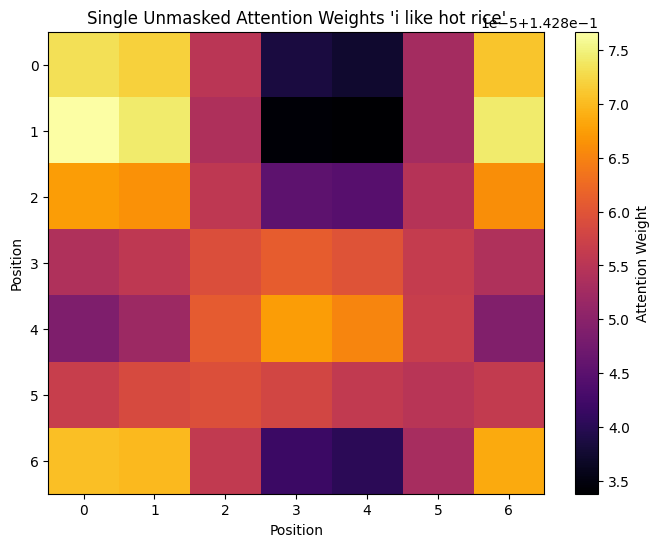

In [400]:
s_idx = 1
v_sentence = sentences[s_idx]

# plot weight before being masked
plt.figure(figsize=(8, 6))
plt.imshow(single_weights[s_idx], cmap='inferno', aspect='auto')
plt.colorbar(label='Attention Weight')
plt.xlabel('Position')
plt.ylabel('Position')
plt.title(f"Single Unmasked Attention Weights '{v_sentence}'")

plt.show()

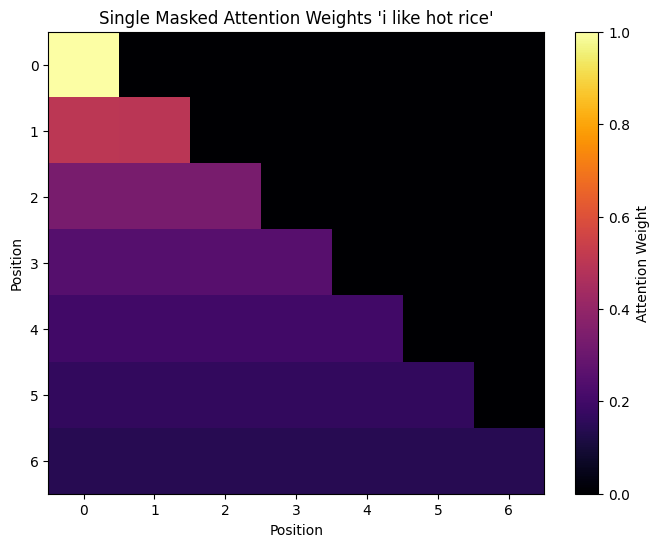

In [401]:
# plot weight after being masked
plt.figure(figsize=(8, 6))
plt.imshow(single_masked_weights[s_idx], cmap='inferno', aspect='auto')
plt.colorbar(label='Attention Weight')
plt.xlabel('Position')
plt.ylabel('Position')
plt.title(f"Single Masked Attention Weights '{v_sentence}'")

plt.show()

In [223]:
single_masked_output.shape

(10, 7, 4)

In [224]:
single_masked_weights.shape

(10, 7, 7)

## Multi-Head Attention 

In [225]:
def split_heads(x, num_heads):
    batch_size, seq_len, d_model = x.shape
    head_dim = d_model // num_heads
    x = x.reshape(batch_size, seq_len, num_heads, head_dim)
    return x.transpose(0, 2, 1, 3)  

In [ ]:
def combine_heads(x):
    batch_size, num_heads, seq_len, head_dim = x.shape
    return x.transpose(0, 2, 1, 3).reshape(batch_size, seq_len, num_heads * head_dim)

In [ ]:
# function for multi head attention
def multi_head_attention(X, num_heads):
    assert num_heads>0, "number of heads must be more than 0"
    
    d_model = X.shape[-1]
    assert d_model % num_heads == 0, "input dimension must be divisible by number of heads"

    # init random Q, V, K
    W_Q = np.random.randn(d_model, d_model) * 0.01
    W_K = np.random.randn(d_model, d_model) * 0.01
    W_V = np.random.randn(d_model, d_model) * 0.01

    Q = np.matmul(X, W_Q)  # [batch, seq_len, d_model]
    K = np.matmul(X, W_K)
    V = np.matmul(X, W_V)

    # split into heads
    Q = split_heads(Q, num_heads)  # [batch, heads, seq_len, head_dim]
    K = split_heads(K, num_heads)
    V = split_heads(V, num_heads)

    # attention for each head
    attention_output, attn_weights = scaled_dot_product_attention(Q, K, V, mask=causal_mask, multi=True) # use causal mask & add multi=True to use the correct transpose function

    # combine heads
    output = combine_heads(attention_output)  

    return output, attn_weights

In [228]:
# get multi head attention output & weights based on our embedding input
heads = 2
out, weights = multi_head_attention(embedding_with_positional_enc, heads)
(out, weights)

(array([[[-0.00856027,  0.00627727,  0.00422166,  0.00068761],
         [-0.00687831, -0.00089795,  0.00448609,  0.00019308],
         [-0.00201191, -0.00717587,  0.00620065, -0.00103155],
         [ 0.003156  , -0.00993352,  0.00824201, -0.00228898],
         [ 0.0060168 , -0.00888926,  0.0094932 , -0.00295886],
         [ 0.00598482, -0.00602369,  0.00955415, -0.00294077],
         [ 0.00432105, -0.003905  ,  0.00886079, -0.00255006]],
 
        [[-0.00856027,  0.00627727,  0.00422166,  0.00068761],
         [-0.00692315, -0.00088033,  0.0044616 ,  0.00021176],
         [-0.00210543, -0.00714376,  0.00617064, -0.00099283],
         [ 0.00302135, -0.00988803,  0.00820655, -0.00223427],
         [ 0.00593099, -0.00885558,  0.00946791, -0.00292274],
         [ 0.00590316, -0.00600892,  0.00954346, -0.00290489],
         [ 0.00425108, -0.00389234,  0.00885163, -0.0025193 ]],
 
        [[-0.00856027,  0.00627727,  0.00422166,  0.00068761],
         [-0.00697024, -0.00091182,  0.00449989, 

In [229]:
out.shape

(10, 7, 4)

In [230]:
weights.shape

(10, 2, 7, 7)

## Feed-Forward Network

In [241]:
class FeedForward:
    def __init__(self, d_model, d_ff=16):
        self.W1 = np.random.randn(d_model, d_ff) * 0.01
        self.b1 = np.zeros(d_ff)
        self.W2 = np.random.randn(d_ff, d_model) * 0.01
        self.b2 = np.zeros(d_model)

    def __call__(self, x):
        hidden = np.maximum(0, x @ self.W1 + self.b1)  # ReLU
        return hidden @ self.W2 + self.b2

In [252]:
ffn = FeedForward(embedding_dimension)

In [ ]:
ffn_out = ffn(out)
ffn_out

array([[[-4.13855477e-06,  2.14572075e-06, -2.51401884e-06,
          3.48242587e-06],
        [-6.92309046e-07,  8.99734872e-07, -1.99377933e-06,
         -1.41940649e-06],
        [ 1.98037387e-06, -2.16169125e-07, -3.18970837e-07,
         -2.81414102e-06],
        [ 1.53727329e-06, -1.27293517e-06,  9.80880195e-07,
         -8.53241178e-07],
        [ 2.00157709e-06, -2.20478507e-06,  9.42616716e-07,
          2.28190180e-07],
        [ 1.70132840e-06, -2.41717848e-06,  9.93591769e-07,
          1.57635178e-07],
        [ 3.46458153e-07, -1.71139304e-06,  6.93727587e-07,
          4.58828564e-07]],

       [[-4.13855477e-06,  2.14572075e-06, -2.51401884e-06,
          3.48242587e-06],
        [-6.89592970e-07,  8.94926876e-07, -1.99012054e-06,
         -1.41195599e-06],
        [ 1.99305597e-06, -1.93684102e-07, -3.41878084e-07,
         -2.84964794e-06],
        [ 1.51587852e-06, -1.25192999e-06,  9.93527692e-07,
         -8.94784917e-07],
        [ 1.97872568e-06, -2.18234251e-06

In [255]:
ffn_out.shape

(10, 7, 4)

## Layer Normalization

In [256]:
def layer_norm(x, eps=1e-6):
    mean = np.mean(x, axis=-1, keepdims=True)
    std = np.std(x, axis=-1, keepdims=True)
    return (x - mean) / (std + eps)

## Residual Connection

In [257]:
# Residual + LayerNorm after multi-head attention
attn_residual = layer_norm(embedding_with_positional_enc + out)

# Residual + LayerNorm after feed-forward
ffn_residual = layer_norm(attn_residual + ffn_out)

ffn_residual

array([[[-1.01571609,  1.00554957, -0.98414148,  0.99430801],
        [ 0.62911355, -0.15761854, -1.55260186,  1.08110685],
        [ 0.8792717 , -1.34008204, -0.5834991 ,  1.04430944],
        [ 0.1373897 , -1.47563015, -0.00474475,  1.34298519],
        [-0.93709112, -0.81595187,  0.1984747 ,  1.55456829],
        [-1.50580887,  0.26713658, -0.04925011,  1.28792241],
        [-1.28726289,  0.94661417, -0.66299643,  1.00364515]],

       [[-1.01571609,  1.00554957, -0.98414148,  0.99430801],
        [ 0.63547007, -0.1512034 , -1.55667702,  1.07241036],
        [ 0.88510022, -1.33571429, -0.59045347,  1.04106754],
        [ 0.1415996 , -1.47413374, -0.01161479,  1.34414894],
        [-0.93778656, -0.81738449,  0.20226403,  1.55290702],
        [-1.50156624,  0.26278807, -0.05475762,  1.29353579],
        [-1.28729242,  0.94659372, -0.66295514,  1.00365384]],

       [[-1.01571609,  1.00554957, -0.98414148,  0.99430801],
        [ 0.63365118, -0.15284316, -1.55560912,  1.0748011 ],
    

In [258]:
ffn_residual.shape

(10, 7, 4)

## Output Layer

In [259]:
# Suppose ffn_residual is your final transformer block output
vocab_size = len(vocab)
d_model = ffn_residual.shape[-1]
W_out = np.random.randn(d_model, vocab_size) * 0.01
b_out = np.zeros(vocab_size)

# Project to vocabulary size (logits for each token)
logits = ffn_residual @ W_out + b_out
logits.shape  # (batch, seq_len, vocab_size)

(10, 7, 20)

In [260]:
logits

array([[[-0.00411762, -0.05724029,  0.01999294, ...,  0.0042937 ,
         -0.00902311, -0.03579598],
        [-0.02672997, -0.0352069 , -0.01465391, ...,  0.02922564,
          0.01052937, -0.05062251],
        [-0.02032588,  0.00928716, -0.02754348, ...,  0.02261127,
          0.02589273, -0.02430921],
        ...,
        [ 0.00257515, -0.00379475,  0.00272493, ..., -0.0023752 ,
          0.01777511, -0.00925417],
        [ 0.0077242 , -0.03093004,  0.02080108, ..., -0.00832382,
          0.00090036, -0.0138449 ],
        [ 0.00153814, -0.05172431,  0.02368583, ..., -0.00183491,
         -0.00892842, -0.02750483]],

       [[-0.00411762, -0.05724029,  0.01999294, ...,  0.0042937 ,
         -0.00902311, -0.03579598],
        [-0.02678272, -0.03527285, -0.01467197, ...,  0.02928005,
          0.01040946, -0.05064898],
        [-0.02043044,  0.00914038, -0.02758817, ...,  0.02272324,
          0.02583209, -0.02446157],
        ...,
        [ 0.00262613, -0.00367817,  0.00273029, ..., -

In [261]:
sentence_idx = 2
print(f"The sentence is {sentences[sentence_idx]}")
sentence_token = tokenized_sentence[sentence_idx]
# print(sentence_token)
idx = len(sentence_token)-1
while(sentence_token[idx] <= 2):
    idx-=1

predicted_sentence = [rvocab[sentence_token[i]] for i in range(idx)]

idx-=1
# print(idx)
last_logits_token = logits[sentence_idx, idx][3:]
# print(last_logits_token)
probs = softmax(last_logits_token)
word_list = [rvocab[i] for i in range(3, vocab_size)]
# print(probs.sum())
# probs
# idx = np.argmax(probs)

# word = rvocab[idx]
for i in range(len(probs)):
    print(f"Word: '{word_list[i]}' have a probability of {probs[i]}")

The sentence is the weather is cold
Word: 'is' have a probability of 0.05951234280390715
Word: 'food' have a probability of 0.05896973038975587
Word: 'rice' have a probability of 0.05792162251178067
Word: 'like' have a probability of 0.05860151051285619
Word: 'the' have a probability of 0.058294195724156506
Word: 'and' have a probability of 0.05800132190765407
Word: 'weather' have a probability of 0.058153345185685504
Word: 'that' have a probability of 0.05800093829802046
Word: 'hot' have a probability of 0.059519244959630284
Word: 'cold' have a probability of 0.05960324495716237
Word: 'i' have a probability of 0.057628138841085585
Word: 'delicious' have a probability of 0.06127720938832842
Word: 'eat' have a probability of 0.05591256378579591
Word: 'good' have a probability of 0.060417201853535295
Word: 'today' have a probability of 0.05949836565512508
Word: 'are' have a probability of 0.06052120092789353
Word: 'noodle' have a probability of 0.058167822297626987


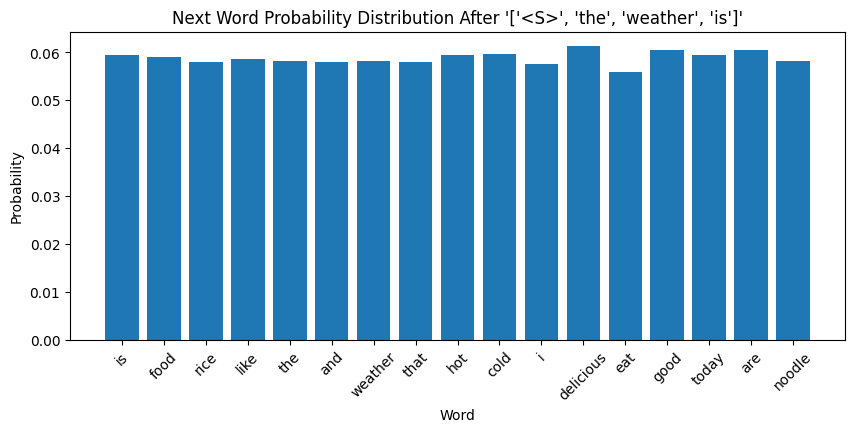

In [262]:
plt.figure(figsize=(10, 4))
plt.bar(words, probs)
plt.xlabel('Word')
plt.ylabel('Probability')
plt.title(f"Next Word Probability Distribution After '{predicted_sentence}'")
plt.xticks(rotation=45)
plt.show()